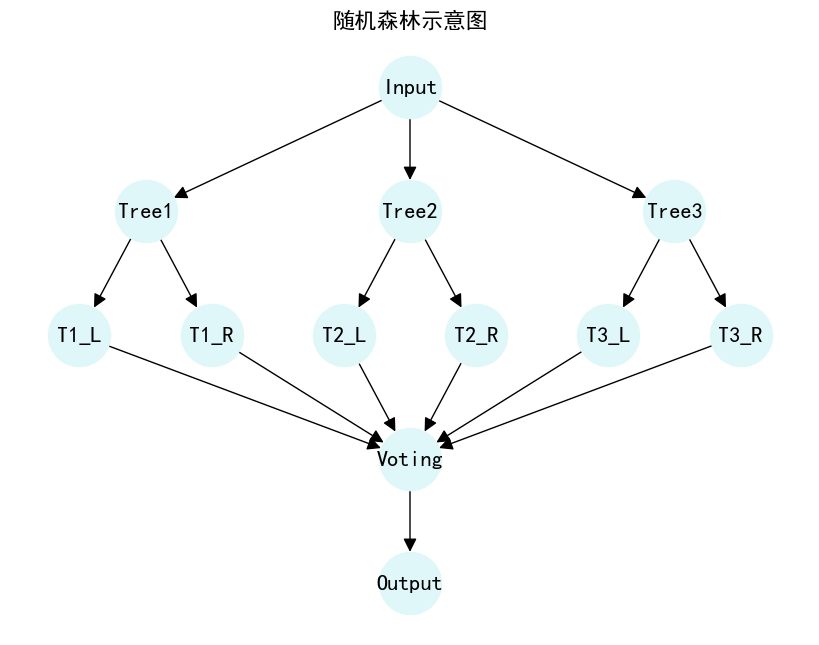

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# 设置 matplotlib 字体以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用一个常见的中文宋体字体，如果 SimHei 不可用，可以尝试 'Microsoft YaHei' 等
plt.rcParams['axes.unicode_minus'] = False # 确保负号正常显示


# 创建一个空图
G = nx.DiGraph()

# 添加决策树的根节点
G.add_node("Input", pos=(0, 0))

# 添加三棵树的根节点
for i in range(1, 4):
    G.add_node(f"Tree{i}", pos=(-2 + 2*(i-1), -1))
    G.add_edge("Input", f"Tree{i}")

    # 每棵树有两个叶子节点
    G.add_node(f"T{i}_L", pos=(-2.5 + 2*(i-1), -2))
    G.add_node(f"T{i}_R", pos=(-1.5 + 2*(i-1), -2))
    G.add_edge(f"Tree{i}", f"T{i}_L")
    G.add_edge(f"Tree{i}", f"T{i}_R")

# 添加投票节点
G.add_node("Voting", pos=(0, -3))
for i in range(1, 4):
    G.add_edge(f"T{i}_L", "Voting")
    G.add_edge(f"T{i}_R", "Voting")

# 添加输出节点
G.add_node("Output", pos=(0, -4))
G.add_edge("Voting", "Output")

# 获取节点位置
pos = nx.get_node_attributes(G, 'pos')

# 绘制图形
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="#e0f7fa", font_size=16, font_weight='bold', arrowsize=20)
plt.title("随机森林示意图", fontsize=16)
plt.axis('off')
plt.savefig("random_forest.pdf", format='pdf', bbox_inches='tight')
plt.show()